<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#전처리" data-toc-modified-id="전처리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>전처리</a></span><ul class="toc-item"><li><span><a href="#published_at-=&gt;-date" data-toc-modified-id="published_at-=>-date-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>published_at =&gt; date</a></span></li><li><span><a href="#content-불용어-처리,-단어-토큰화" data-toc-modified-id="content-불용어-처리,-단어-토큰화-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>content 불용어 처리, 단어 토큰화</a></span></li><li><span><a href="#title-불용어-처리,-단어-토큰화" data-toc-modified-id="title-불용어-처리,-단어-토큰화-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>title 불용어 처리, 단어 토큰화</a></span></li></ul></li><li><span><a href="#키워드선정" data-toc-modified-id="키워드선정-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>키워드선정</a></span><ul class="toc-item"><li><span><a href="#장바구니-분석(지지도)-=&gt;-실패" data-toc-modified-id="장바구니-분석(지지도)-=>-실패-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>장바구니 분석(지지도) =&gt; 실패</a></span></li><li><span><a href="#길이가-1인-단어-제외-=&gt;-실패" data-toc-modified-id="길이가-1인-단어-제외-=>-실패-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>길이가 1인 단어 제외 =&gt; 실패</a></span></li><li><span><a href="#word-cloud" data-toc-modified-id="word-cloud-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>word cloud</a></span></li><li><span><a href="#문서별-유의미한-카워드-추출" data-toc-modified-id="문서별-유의미한-카워드-추출-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>문서별 유의미한 카워드 추출</a></span><ul class="toc-item"><li><span><a href="#TF-IDF-이용" data-toc-modified-id="TF-IDF-이용-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>TF-IDF 이용</a></span></li><li><span><a href="#제목만-가지고-키워드-추출" data-toc-modified-id="제목만-가지고-키워드-추출-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>제목만 가지고 키워드 추출</a></span></li></ul></li></ul></li></ul></div>

libraries  
* [korean](https://pythonhosted.org/korean/ko/)

In [12]:
import numpy as np
# file I/O
import pandas as pd
import pickle

# nlp
import re
from konlpy.tag import Okt
#import korean

## 데이터 불러오기

In [13]:
with open('data/삼성/rawdata_삼성_5000.pickle','rb') as f:
    data = pickle.load(f)

In [14]:
data['return_object']['documents'][0].keys()

dict_keys(['news_id', 'title', 'content', 'hilight', 'published_at', 'enveloped_at', 'dateline', 'provider', 'category', 'category_incident', 'provider_subject'])

In [15]:
# 초기화
dict_news = {'news_id':[],'title':[],'content':[],'date':[]}
news_id_list,title_list, content_list, date_list = [],[],[],[]
n_docs = len(data['return_object']['documents'])
docs = data['return_object']['documents']

In [16]:
for idx in range(n_docs):
    news_id_list.append(docs[idx]['news_id'])
    title_list.append(docs[idx]['title'])
    content_list.append(docs[idx]['content'])
    date_list.append(docs[idx]['dateline'])

In [17]:
dict_news['news_id'] = news_id_list
dict_news['title'] = title_list
dict_news['content'] = content_list
dict_news['date'] = date_list
df_news = pd.DataFrame(dict_news) # dataframe 생성

## 전처리

### published_at => date

In [9]:
df_news['day'] = df_news['date'].apply(lambda date : date.split('T')[0])
df_news['time'] = df_news['date'].apply(lambda date : date.split('T')[1][:8])

### content 불용어 처리, 단어 토큰화

In [18]:
# 일반적 불용어 처리
reg_reporter = re.compile('[가-힣]+\s[가-힣]*기자') # 기자
reg_email = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$') # 이메일
reg_eng = re.compile('[a-z]+') # 소문자 알파벳, 이메일 제거용, 대문자는 남겨둔다
reg_chi = re.compile("[\u4e00-\u9fff]+") # 한자
reg_sc = re.compile("·|ㆍ|ㆍ|…|◆+|◇+|▶+|●+|▲+|“|”|‘|’|\"|\'|\(|\)|\W+") # 특수문자
reg_date = re.compile('\d*일|\d*월|\d*년|\d*시|\d*분|\(현지시간\)|\(현지시각\)') #날짜,시간,숫자

def preProcessing(doc):
    tmp = re.sub(reg_reporter, '', doc)
    tmp = re.sub(reg_email, '', tmp)
    tmp = re.sub(reg_eng, '', tmp)
    tmp = re.sub(reg_chi, '', tmp)
    tmp = re.sub(reg_sc, ' ', tmp)
    tmp = re.sub(reg_date, '', tmp)
    return tmp

okt = Okt()

In [19]:
df_news['content_pp'] = df_news['content'].apply(preProcessing)
df_news['tokenized'] = df_news['content_pp'].apply(lambda x:okt.nouns(x))

### title 불용어 처리, 단어 토큰화

In [20]:
df_news['title_pp'] = df_news['title'].apply(preProcessing)
df_news['tokenized_title'] = df_news['title_pp'].apply(lambda x:okt.nouns(x))

In [22]:
df_news.head()

,news_id,title,content,date,content_pp,tokenized,title_pp,tokenized_title
0,01101101.20190417050449002,"공황장애 극복한 홍상삼, 폭투 5개에 눈물",아웃카운트 1개 못 잡아 714일 만의 선발승 불발\n\n\n\n두산의 임시 선발 ...,2019-04-18T05:04:49.000+09:00,아웃카운트 1개 못 잡아 만의 선발승 불발 두산의 임 선발 홍상삼 29 이 만에...,"[아웃카운트, 개, 못, 선발, 승, 불발, 두산, 임, 선발, 홍상삼, 이, 선발...",공황장애 극복한 홍상삼 폭투 5개에 눈물,"[공황장애, 극복, 홍상삼, 폭투, 개, 눈물]"
1,01101101.20190417050445001,"5G폰 출시 앞둔 화웨이 ""최고 속도""... 삼성 정조준",현재 유일한 5세대(G) 통신 스마트폰 ‘갤럭시S10 5G’를 판매하고 있는 삼성전...,2019-04-18T05:04:45.000+09:00,현재 유한 5세대 G 통신 스마트폰 갤럭S10 5G 를 판매하고 있는 삼성전자는 ...,"[현재, 유한, 세대, 통신, 스마트폰, 갤럭, 를, 판매, 전자, 전자, 폰, 연...",5G폰 출 앞둔 화웨이 최고 속도 삼성 정조준,"[폰, 화웨이, 최고, 속도, 삼성, 정, 조준]"
2,01101101.20190417050434003,[부고]백승숙씨 별세 外,▲백승숙씨 별세ㆍ김태영(채널A 대전충청취재본부 기자)씨 모친상=17일 오후5시 충남...,2019-04-18T05:04:34.000+09:00,백승숙씨 별세 김태영 채널A 씨 모친상 오후 충남대병원 발인 낮 042 280...,"[백승, 숙, 별세, 김태영, 채널, 씨, 모친상, 오후, 충남대, 병원, 발인, ...",부고 백승숙씨 별세,"[부고, 백승, 숙, 별세]"
3,01101101.20190417050342001,"“불에 데고 살을 베는 통증” 박근혜 측, 형 집행정지 신청",법원에서 발부한 구속영장 기한이 종료돼 기결수로 신분이 전환된 박근혜 전 대통령 측...,2019-04-18T05:03:42.000+09:00,법원에서 발부한 구속영장 기한이 종료돼 기결수로 신이 전환된 박근혜 전 대통령 측이...,"[법원, 발부, 구속영장, 기한, 종료, 기결, 수로, 신, 전환, 박근혜, 전, ...",불에 데고 살을 베는 통증 박근혜 측 형 집행정지 신청,"[불, 데, 살, 통증, 박근혜, 형, 집행정지, 신청]"
4,01101101.20190417050330003,"""공이 안 날아가요” 타고투저 깨는 공인구의 역습",삼성 구자욱(26)은 지난 12일 대구 KT전에서 좌완 금민철을 상대로 가운데 담장...,2019-04-18T05:03:30.000+09:00,삼성 구자욱 26 은 지난 대구 KT전에서 좌완 금민철을 상대로 가운데 담장을 향...,"[삼성, 구자욱, 은, 지난, 대구, 전, 좌완, 금민철, 상대로, 가운데, 담장,...",공이 안 날아가요 타고투저 깨는 공인구의 역습,"[공이, 안, 고투, 인구, 역습]"


In [223]:
df_news.to_csv('삼성.csv',header = True, index = False)

## 키워드선정

### 장바구니 분석(지지도) => 실패

* 등,것, 수, 이 같은 단어들이 많이 나온다.
* 단어만 뽑을 수 있도록 전처리를 해야함, 단순히 빈도수로 선정하면 문제 조낸 많을것으로 보인다.

In [24]:
# 전체 단어 빈도를 확인해본다.
word_list = []
word_list_title = []

# 전체 단어 리스트 합치기(content)
for idx in range(df_news['tokenized'].shape[0]) : word_list += df_news['tokenized'][idx]
words = pd.Series(word_list)

# 전체 단어 리스트 합치기(content)t
for idx in range(df_news['tokenized_title'].shape[0]) : word_list_title += df_news['tokenized_title'][idx]
words_title = pd.Series(word_list_title)

In [25]:
words.value_counts()

등        13797
것        13559
수         9848
이         9322
삼성        9005
고         7333
전         6972
전자        6307
말         5340
를         4892
개         4884
한국        4633
지난해       4589
위         4534
기업        4409
의         3779
서울        3535
중         3530
장         3315
명         3312
로         3300
경기        3287
점         3216
그         3096
사업        2948
기술        2939
며         2924
회장        2896
국내        2847
때         2613
         ...  
귀로           1
옹기           1
자치권          1
장금           1
뒤탈           1
또렸했다         1
절음           1
민숙           1
한장           1
라이플          1
해방구          1
북아메리카        1
애교           1
좇는           1
신기철          1
루게릭병         1
항공회사         1
김의기          1
초상권          1
이몽           1
알카텔          1
신용판매         1
미생물학         1
진주고          1
구룡포읍         1
마킹           1
니프           1
통고           1
도쿠마          1
교각           1
Length: 33211, dtype: int64

In [26]:
words_title.value_counts()

삼성      951
전자      320
부고      203
별세      194
한국      168
위       157
갤럭      157
기업      146
르노      144
등       140
첫       132
세계      130
전       109
명       104
서울      104
카드      101
차       100
회장       98
반도체      96
개        95
폰        92
현대차      92
경기       91
오늘       90
기        84
포토       81
사        80
투자       79
경제       72
외        69
       ... 
김지훈       1
용접        1
패권        1
성황        1
사제        1
내정자       1
순교자       1
심방        1
구한말       1
김상우       1
호철        1
긍정        1
원카드       1
가정사       1
지배        1
꽃비        1
벌린다       1
남산        1
그날        1
제라        1
올린다       1
이모저모      1
프러포즈      1
설사        1
콧         1
유력        1
종국        1
의지        1
오거돈       1
연고        1
Length: 7411, dtype: int64

### 길이가 1인 단어 제외 => 실패

* 길이가 1인 단어는 총 915가지가 있다.
* 한글자는 의미를 나타내지 못하기 때문에 키워드로써 부적절하다. 고로 삭제한다.
* 삭제해도 의미있는 키워드를 찾기 어렵다. '지난','사업', '국내' 등 의미가 약한 키워드가 많이 나온다.
* 문서별로 유의미한 키워드를 추려내고, 전체 단어 빈도를 확인해야한다.

In [27]:
one_word_list = []
for word in word_list:
    if len(word)==1 : one_word_list.append(word)
one_words = pd.Series(one_word_list)

In [28]:
# 빈도 확인
one_words.value_counts()

등    13797
것    13559
수     9848
이     9322
고     7333
전     6972
말     5340
를     4892
개     4884
위     4534
의     3779
중     3530
장     3315
명     3312
로     3300
점     3216
그     3096
며     2924
때     2613
씨     2381
간     2330
더     2277
날     2221
작     2218
팀     2122
차     2068
부     2008
즌     1936
달     1920
도     1829
     ...  
윗        1
잼        1
룬        1
헝        1
퓨        1
짱        1
벳        1
륜        1
슝        1
꿩        1
씌        1
쩐        1
렁        1
텄        1
셨        1
았        1
뭡        1
녘        1
뭣        1
욘        1
들        1
멕        1
걔        1
숯        1
릭        1
닐        1
웨        1
빽        1
첼        1
쥬        1
Length: 915, dtype: int64

In [29]:
# 한글자 명사 제거
word_list2 = []
for word in word_list:
    if len(word)!=1 : word_list2.append(word)
long_words = pd.Series(word_list2)

In [30]:
long_words_table = long_words.value_counts()

In [31]:
long_words_table

삼성       9005
전자       6307
한국       4633
지난해      4589
기업       4409
서울       3535
경기       3287
사업       2948
기술       2939
회장       2896
국내       2847
서비스      2591
그룹       2583
올해       2547
갤럭       2497
대표       2490
세계       2460
지난       2435
미국       2426
때문       2404
위해       2311
통해       2298
대한       2267
업체       2242
산업       2141
투자       2123
카드       2107
스마트폰     2089
오전       2085
반도체      2067
         ... 
급차          1
달초          1
용매          1
불투          1
운남성         1
백기완         1
안토니         1
불가리         1
박유악         1
얄라          1
정몽원         1
수운          1
진귀          1
윈난성         1
졸개          1
세례          1
청국장         1
내트웍스우       1
박막          1
진석          1
포비          1
위치인식        1
김윤태         1
정수창         1
루원티         1
보톡스         1
홈피          1
남아공         1
비원          1
교각          1
Length: 32296, dtype: int64

### word cloud

In [164]:
n_word = len(word_list2)

In [165]:
n_word

1000206

In [203]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        font_path='data/H2GTRE.TTF',
        background_color='white',
        max_words=5000,
        max_font_size=50, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

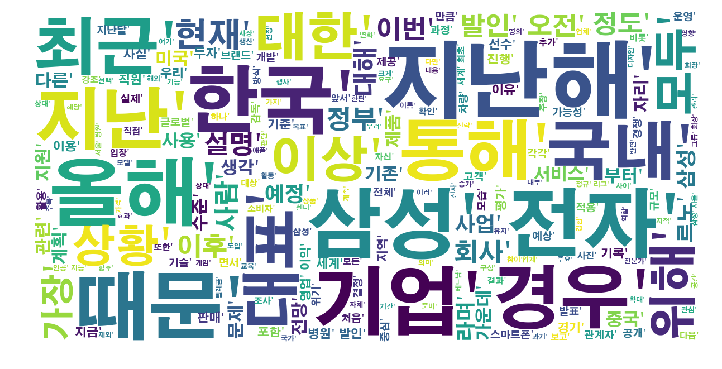

In [198]:
show_wordcloud(long_words)

예쁘다

### 문서별 유의미한 카워드 추출

#### TF-IDF 이용

In [45]:
' '.join(tmp_tokenized[0])

'아웃카운트 개 못 선발 승 불발 두산 임 선발 홍상삼 이 선발 승 기회 눈앞 홍상삼 잠실 전 선발 등 팀 사 루 교체 아웃카운트 개 선발 승 요건 수 고질 약점 제구 문제 임무 폭투 다섯 차례 범 프로야구 경기 최 폭투 불명예 신기록 작성 종전 박정 후 롯데 를 비롯 명의 투수 개 폭투 범 홍상삼 비교 선방 선두 타자 김강민 볼넷 나머지 세 타자 모두 범타 처리 이재원 솔로 홈런 후속 타자 범타 요리 무사 루 위기 실점 삼자범퇴 이닝 문제 선두 타자 고종욱 안타 박승욱 김성현 내야 땅볼 대구 성전 이후 선발 승 눈앞 이후 번 김강민 타석 때 폭투 후 타점 적타 번 한동민 타석 두 차례 폭투 질 점 더 헌납 한동민 내야 안타 허용 김태형 두산 감독 투구 수 개 기록 홍상삼 윤명준 교체 홍상삼 이닝 피 안타 피홈런 볼넷 탈삼진 실점 기록 비록 홍상삼 승리 투수 팀 승리 발판 투구 두산 선 선발 앙헬 산체스 이닝 실점 무너 승기 점 추가 찌 감치 승부 두산 완승 허벅지 부상 이탈 이용찬 공백 홍상삼 당간 선발 등판 기회 더 것 김태형 감독 경기 후 홍상삼 승리 며 본인 스스로 발전 계기 것 고 말 홍상삼 선발 승 욕심 때문 힘 게 결과 며 군 등 판이 지난주 토요 체력 문제 타이밍 등판 고 소감 지난해 심리 압박 감 공황장애 군 강석천 감독 정재훈 코치 극복 수 승리 보답 고'

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tmp_tokenized = df_news['tokenized'].apply(lambda x : ' '.join(x))
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(tmp_tokenized)

In [106]:
x = x.toarray()

In [131]:
# check feature names
words = np.array(tfidf.get_feature_names())

In [69]:
# 문서별 tf idf가 높은 단어를 골라온다
# tfidf 수치 범위 확인
# 0 - 0.92, 32296개 단어
max_tfidf = np.max(x)
min_tfidf = np.min(x)
print(f'min : {min_tfidf} , max :  {max_tfidf}')
print(f'shape : {x.shape}')

min : 0.0 , max :  0.9244969484464676
shape : (5000, 32296)


In [215]:
# tfidf가 높은 단어의 인덱스 2개를 가져온다.
# 하나의 기사를 나타내는 키워드는 2개 이하라고 생각함
# 3,5 개로 먼저 테스트 해봤음
def getRankedIndex(data):
    ranks = (-data).argsort()
    top_2_idx = ranks[:2]
    top_2_value = data[top_2_idx]
    return top_2_idx

# 인덱스를 단어로 바꾼다.
def getWord(idx):return(words[idx])

In [ ]:
# '키워드'의 tfidf 수치는 몇일까?

In [217]:
top_2_idx = np.apply_along_axis(getRankedIndex,1,x)
top_2_words = np.apply_along_axis(getWord,1,top_2_idx)

In [218]:
top_2_words = top_2_words.tolist()

In [219]:
## word cloud
words_list_3 = []
for doc in top_2_words:
    words_list_3 = words_list_3 +  doc

In [220]:
pd.Series(words_list_3).value_counts()

발인       172
갤럭       127
오전        99
별세        90
르노        84
카드        82
대통령       73
반도체       73
회장        64
우리은행      64
후보자       56
감독        52
수수료       47
바이오       45
이닝        39
그룹        39
금제        39
안타        38
이익        35
재판        35
베트남       34
주식        34
애플        33
부회장       33
국민연금      31
경기        31
홈런        30
카메라       30
공장        30
지수        29
        ... 
옌푸         1
임대주택       1
박용곤        1
상실         1
김윤옥        1
몽블랑        1
단식         1
인턴         1
바닥재        1
탐지견        1
도어         1
김수         1
볼리비아       1
레피         1
클램쉘        1
논문         1
블랙리스트      1
마우스        1
부실         1
공산당        1
윤진수        1
이정재        1
타이어        1
캐스터        1
프렌즈        1
대수         1
드라마        1
노멀         1
싱텔         1
콘셉트카       1
Length: 3230, dtype: int64

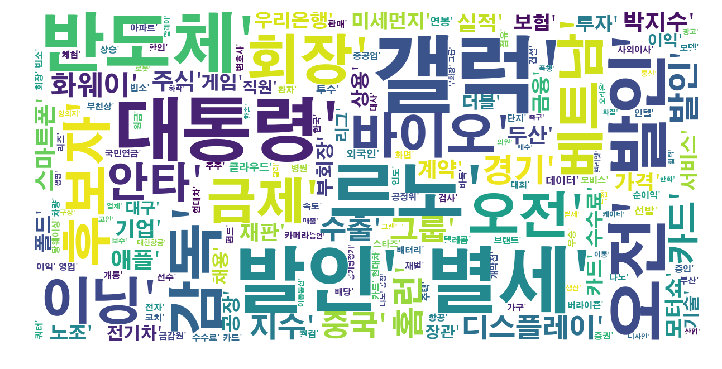

In [221]:
show_wordcloud(words_list_3)

키워드는 idf 만 가지고 계산하는게 더 좋지 않을까?

#### 제목만 가지고 키워드 추출

기사 제목에 핵심키워드를 쓰기 때문에 제목만 가지고 키워드를 추출하는것도 좋아보인다.